#### SECTION A BATCH 1
#### WEEK 4 DATE: 7th APRIL 2022
### EXER 1


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Use the German credit rating dataset “German Credit Data.csv” , Decision treeclassifier to predict good or bad credit. Use “sklearn.model_selection” and GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:
* Splitting criteria: gini or entropy.
* Maximum depth of decision tree ranging from 2 to 10.
* The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score

In [3]:
# https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

# Importing the dataset
df = pd.read_csv("German Credit Data.csv")
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [5]:
df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [6]:
df.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [7]:
cat_cols = df.select_dtypes(include = ['object']).copy()
cat_cols.columns

Index(['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since',
       'personal_status', 'inst_plans', 'job'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
for i in cat_cols.columns:
    df[i] = LabelEncoder().fit_transform(df[i])

In [9]:
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,0,6,4,1169,4,4,4,2,4,67,2,2,2,0
1,1,48,2,5951,0,2,2,1,2,22,2,1,2,1
2,3,12,4,2096,0,3,2,2,3,49,2,1,1,0
3,0,42,2,7882,0,3,2,2,4,45,2,1,2,0
4,0,24,3,4870,0,2,3,2,4,53,2,2,2,1


In [10]:
# Splitting predictor and response variables

X = df.drop(columns = ['status'],axis = 1)
y = df.status

In [11]:
# splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# from sklearn.cross_validation import cross_val_score

gs = GridSearchCV(DecisionTreeClassifier(random_state = 5, criterion = "gini",
                    max_depth = 10),param_grid={"min_samples_split": 
                    range(2, 403, 10)})
gs.fit(X,y.values.ravel())
y_pred = gs.predict(X_test)
results = gs.cv_results_
results

{'mean_fit_time': array([0.00616169, 0.00591149, 0.00318837, 0.0020762 , 0.0034421 ,
        0.00318141, 0.00300441, 0.00203867, 0.00355206, 0.00391726,
        0.00290041, 0.00142374, 0.0028069 , 0.00291629, 0.00271101,
        0.00161738, 0.00441432, 0.00276899, 0.00261345, 0.00300407,
        0.0037127 , 0.00292721, 0.00252194, 0.00242267, 0.00269485,
        0.00151587, 0.00231738, 0.00346022, 0.00281034, 0.00197153,
        0.00373507, 0.00228209, 0.00248632, 0.00222702, 0.00243559,
        0.00147009, 0.00335693, 0.00393529, 0.00387383, 0.00463963,
        0.00257668]),
 'std_fit_time': array([7.54907882e-03, 7.25625818e-03, 6.37674332e-03, 1.78708140e-03,
        4.46538902e-04, 2.84968051e-04, 3.18525673e-04, 1.85258044e-03,
        1.28255900e-05, 9.49679584e-04, 2.06899604e-04, 1.74382061e-03,
        2.26114350e-04, 6.34641417e-06, 4.76258962e-04, 1.40884051e-03,
        4.11494620e-03, 3.00505070e-04, 2.18011002e-04, 8.46321359e-04,
        4.64557350e-03, 8.09718056e-04, 2

In [13]:
accuracy_score(y_pred,y_test)

0.78

In [14]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), tree_para, cv = 5)
grid_search_cv.fit(X_train,y_train)
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
y_pred1 = grid_search_cv.predict(X_test)

In [16]:
accuracy_score(y_pred1,y_test)

0.76

In [17]:
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(X,y,10)

{'criterion': 'gini', 'max_depth': 3}

### 2. Visualize the tree using graphviz software.

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier( random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.76

In [19]:
from sklearn.tree import export_graphviz
import graphviz

In [20]:
dot_data= export_graphviz(clf_model, out_file=None, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True) 

In [21]:
# graph1=graphviz.Source(dot_data)
# graph1

### 3. Display the text representation of the rules learnt.

## EXER 2

#### Download fuel consumption dataset "FuelConsumption.csv", which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions. 

In [22]:
# Importing the dataset
df1 = pd.read_csv("FuelConsumption.csv")
df1.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
df1.shape

(1067, 13)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [25]:
df1.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [26]:
df1.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

* Select the features 'ENGINESIZE', 'CYLINDERS', 
'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the 
model. Plot Emission values with respect to Engine size.

In [27]:
features = df1[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


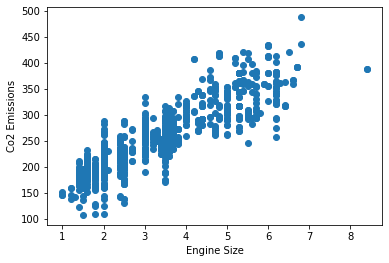

In [28]:
plt.scatter(features.ENGINESIZE,features.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

* split the data into training and test sets (70:30) to create a model using training 
set, evaluate the model using test set, and use model to predict unknown value.

In [29]:
# Splitting the predictor and response variables
X = features.drop('CO2EMISSIONS',axis = 1)
y = features.CO2EMISSIONS

In [30]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [31]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [32]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

* Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

In [39]:
poly_reg = PolynomialFeatures(degree = 2, include_bias =True)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly,y_train)

LinearRegression()

In [40]:
# Predicting the test set
y_pred = lin_reg.predict(X_test_poly)

In [45]:
mae = mean_absolute_error(y_test,y_pred)
mae

10.896885546931621

In [46]:
mse = mean_squared_error(y_test,y_pred)
mse

352.42880358104026

In [47]:
rmse = np.sqrt(mse)
rmse

18.77308721497453

In [48]:
r2 = r2_score(y_test, y_pred)
r2

0.9165127237222419

In [43]:
model_results = pd.DataFrame([['Polynomial Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

# results = results.append(model_results, ignore_index = True)

In [ ]:
model_results

In [ ]:
deg = 0
model_results = pd.DataFrame([['Polynomial Regression',deg, mae, mse, rmse, r2]],
               columns = ['Model','Degree', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

def poly_regression(deg):
    poly_reg = PolynomialFeatures(degree = deg, include_bias =True)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)

    lin_poly_reg = LinearRegression()
    lin_poly_reg.fit(X_train_poly,y_train)
    
    # Predicting the test set
    y_pred = lin_poly_reg.predict(X_test_poly)
    
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results = model_results.append(model_results, ignore_index = True)

In [ ]:
poly_regression(2)

In [ ]:
poly_regression(3)

In [ ]:
poly_regression(4)

In [ ]:
poly_regression(5)

In [ ]:
model_results